# Deep dive: categorical features

In [1]:
import pandas as pd

import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures

from scipy import stats
import numpy as np

Generate some synthetic near-linear data:

In [2]:
X = np.array(range(1,11))

In [3]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
np.random.seed(seed=24)
Y = 2*X + np.random.normal(0, 1, 10)

In [5]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X,Y)

([<matplotlib.axis.YTick at 0x118537580>,
 <a list of 5 Text major ticklabel objects>)

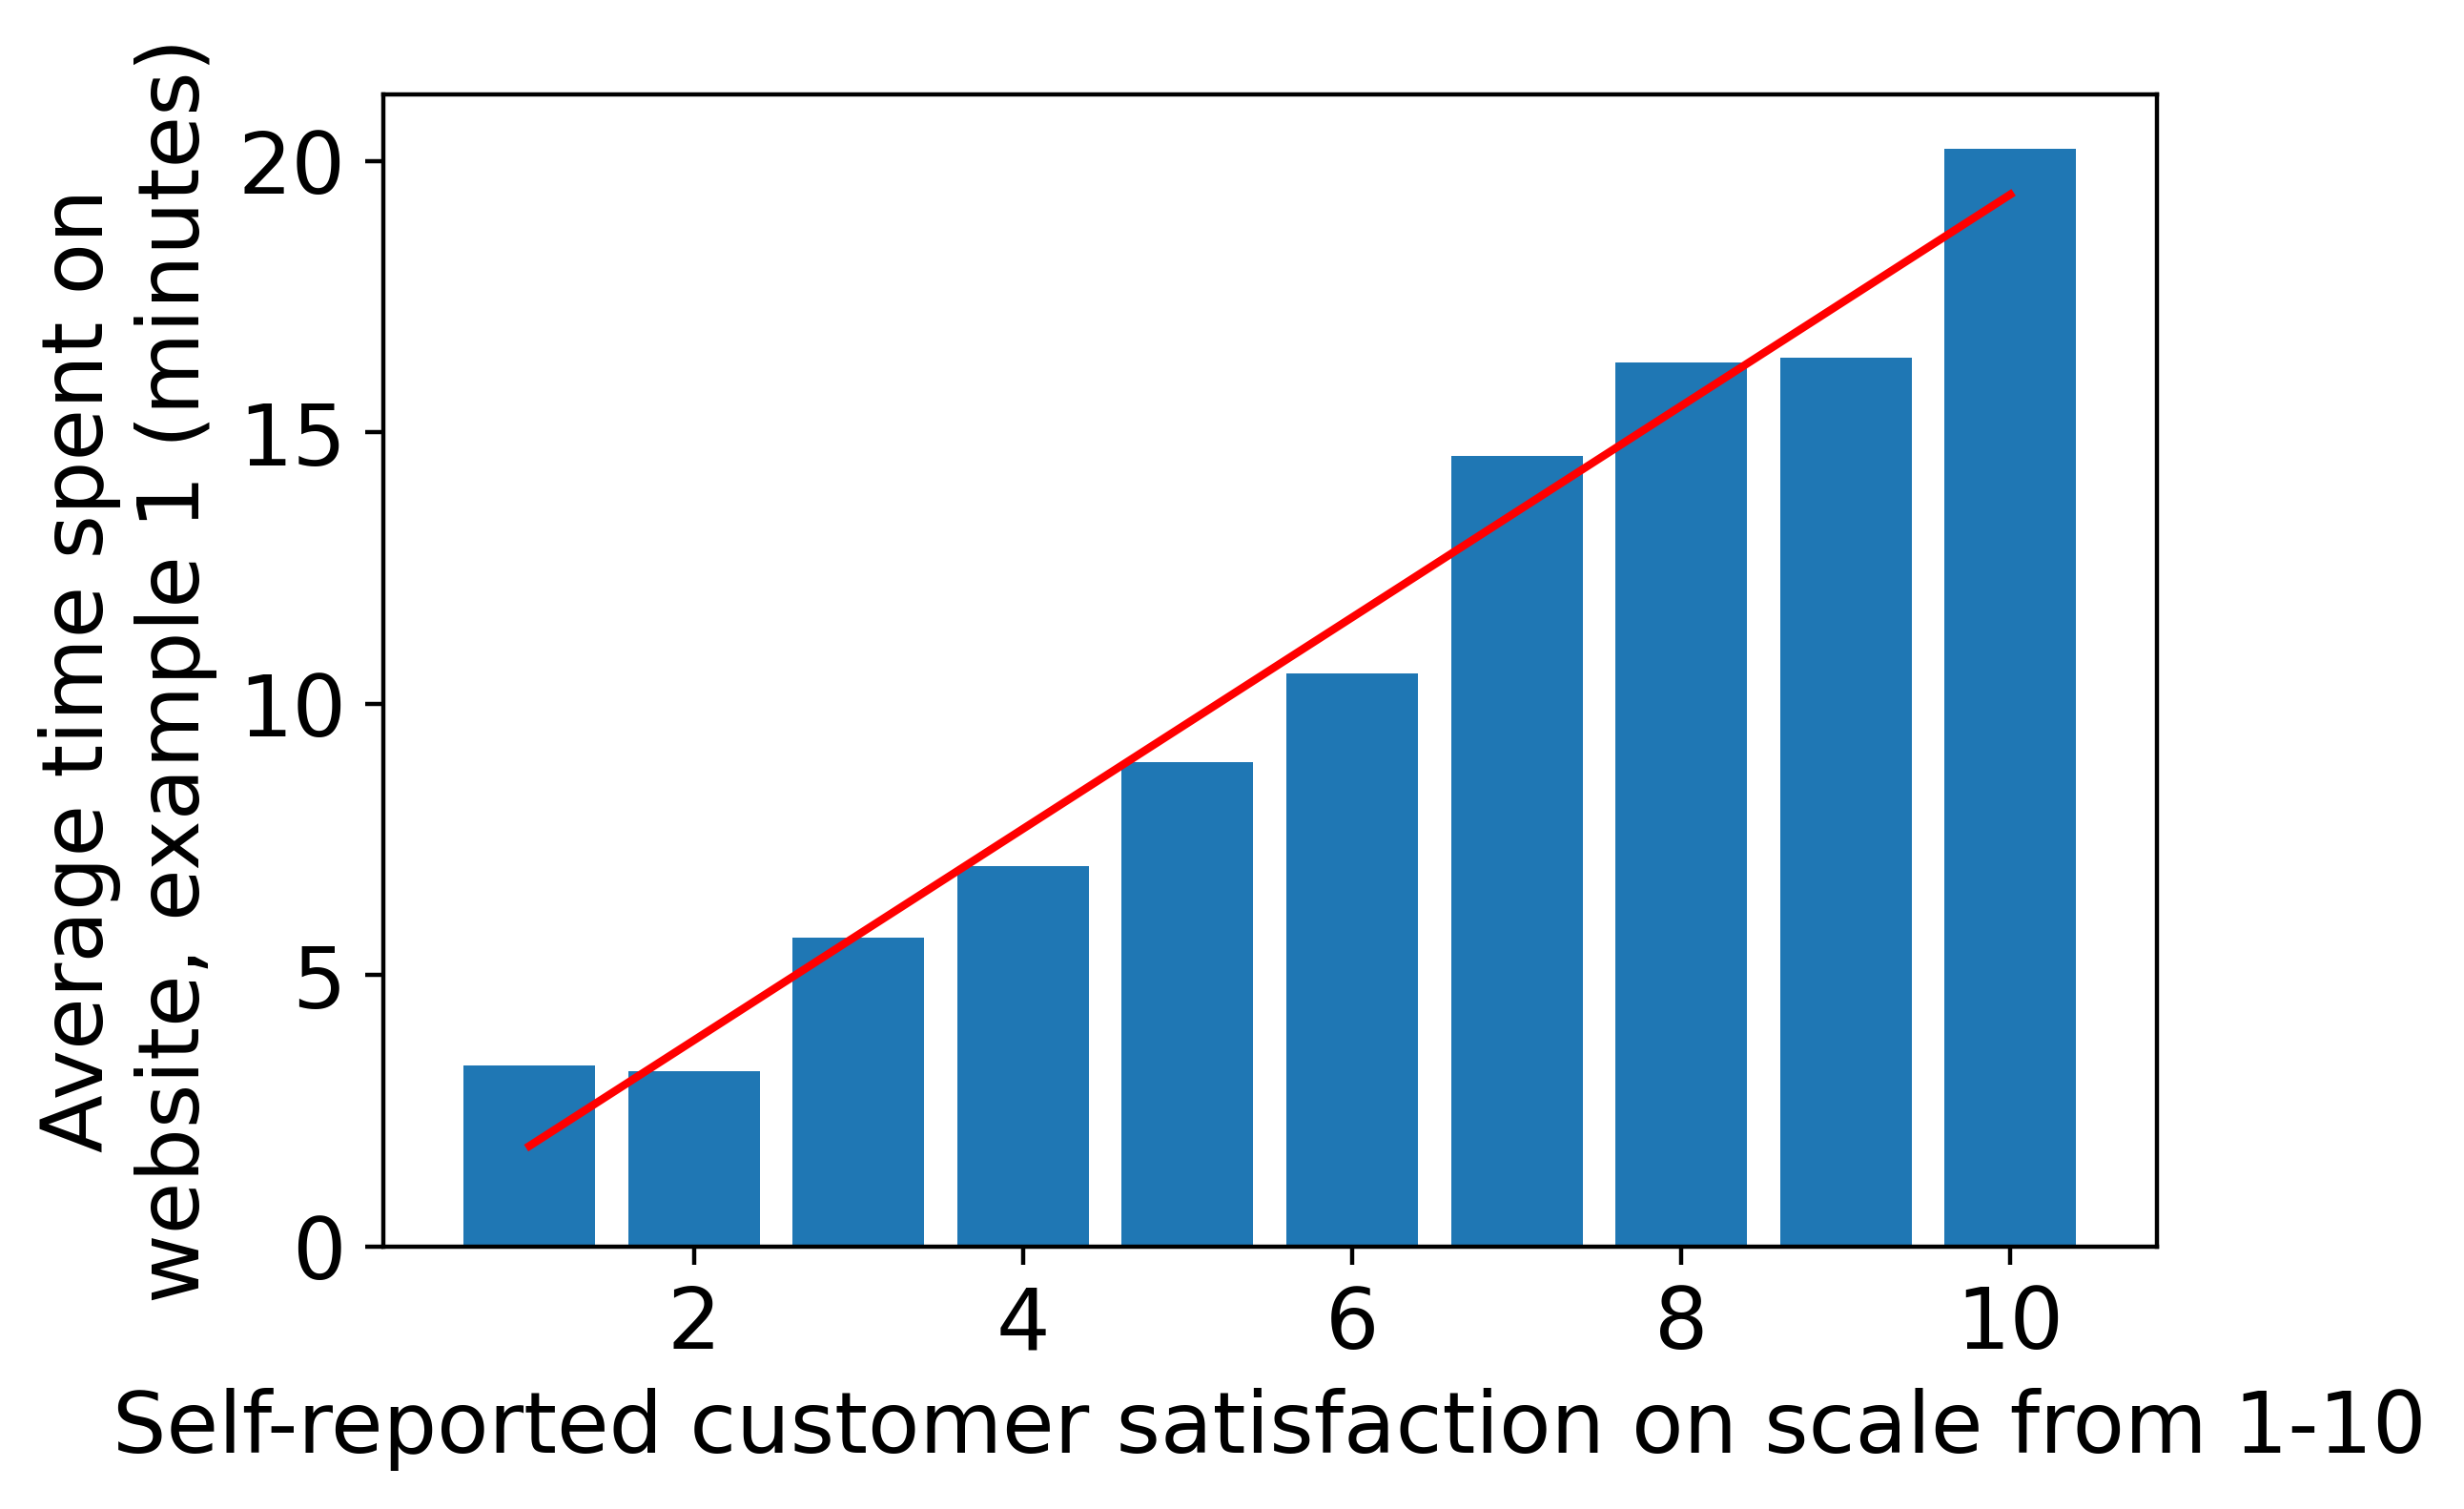

In [6]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 16
plt.plot(X, intercept_line + slope_line*X, 'r-')
plt.bar(X,Y, align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.yticks(range(0,25,5))

And some synthetic polynomial data

In [7]:
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1*(X-2)*(X-9) + 10 + noise

In [8]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X,Y_poly)

Text(0, 0.5, 'Average time spent on\nwebsite, example 2 (minutes)')

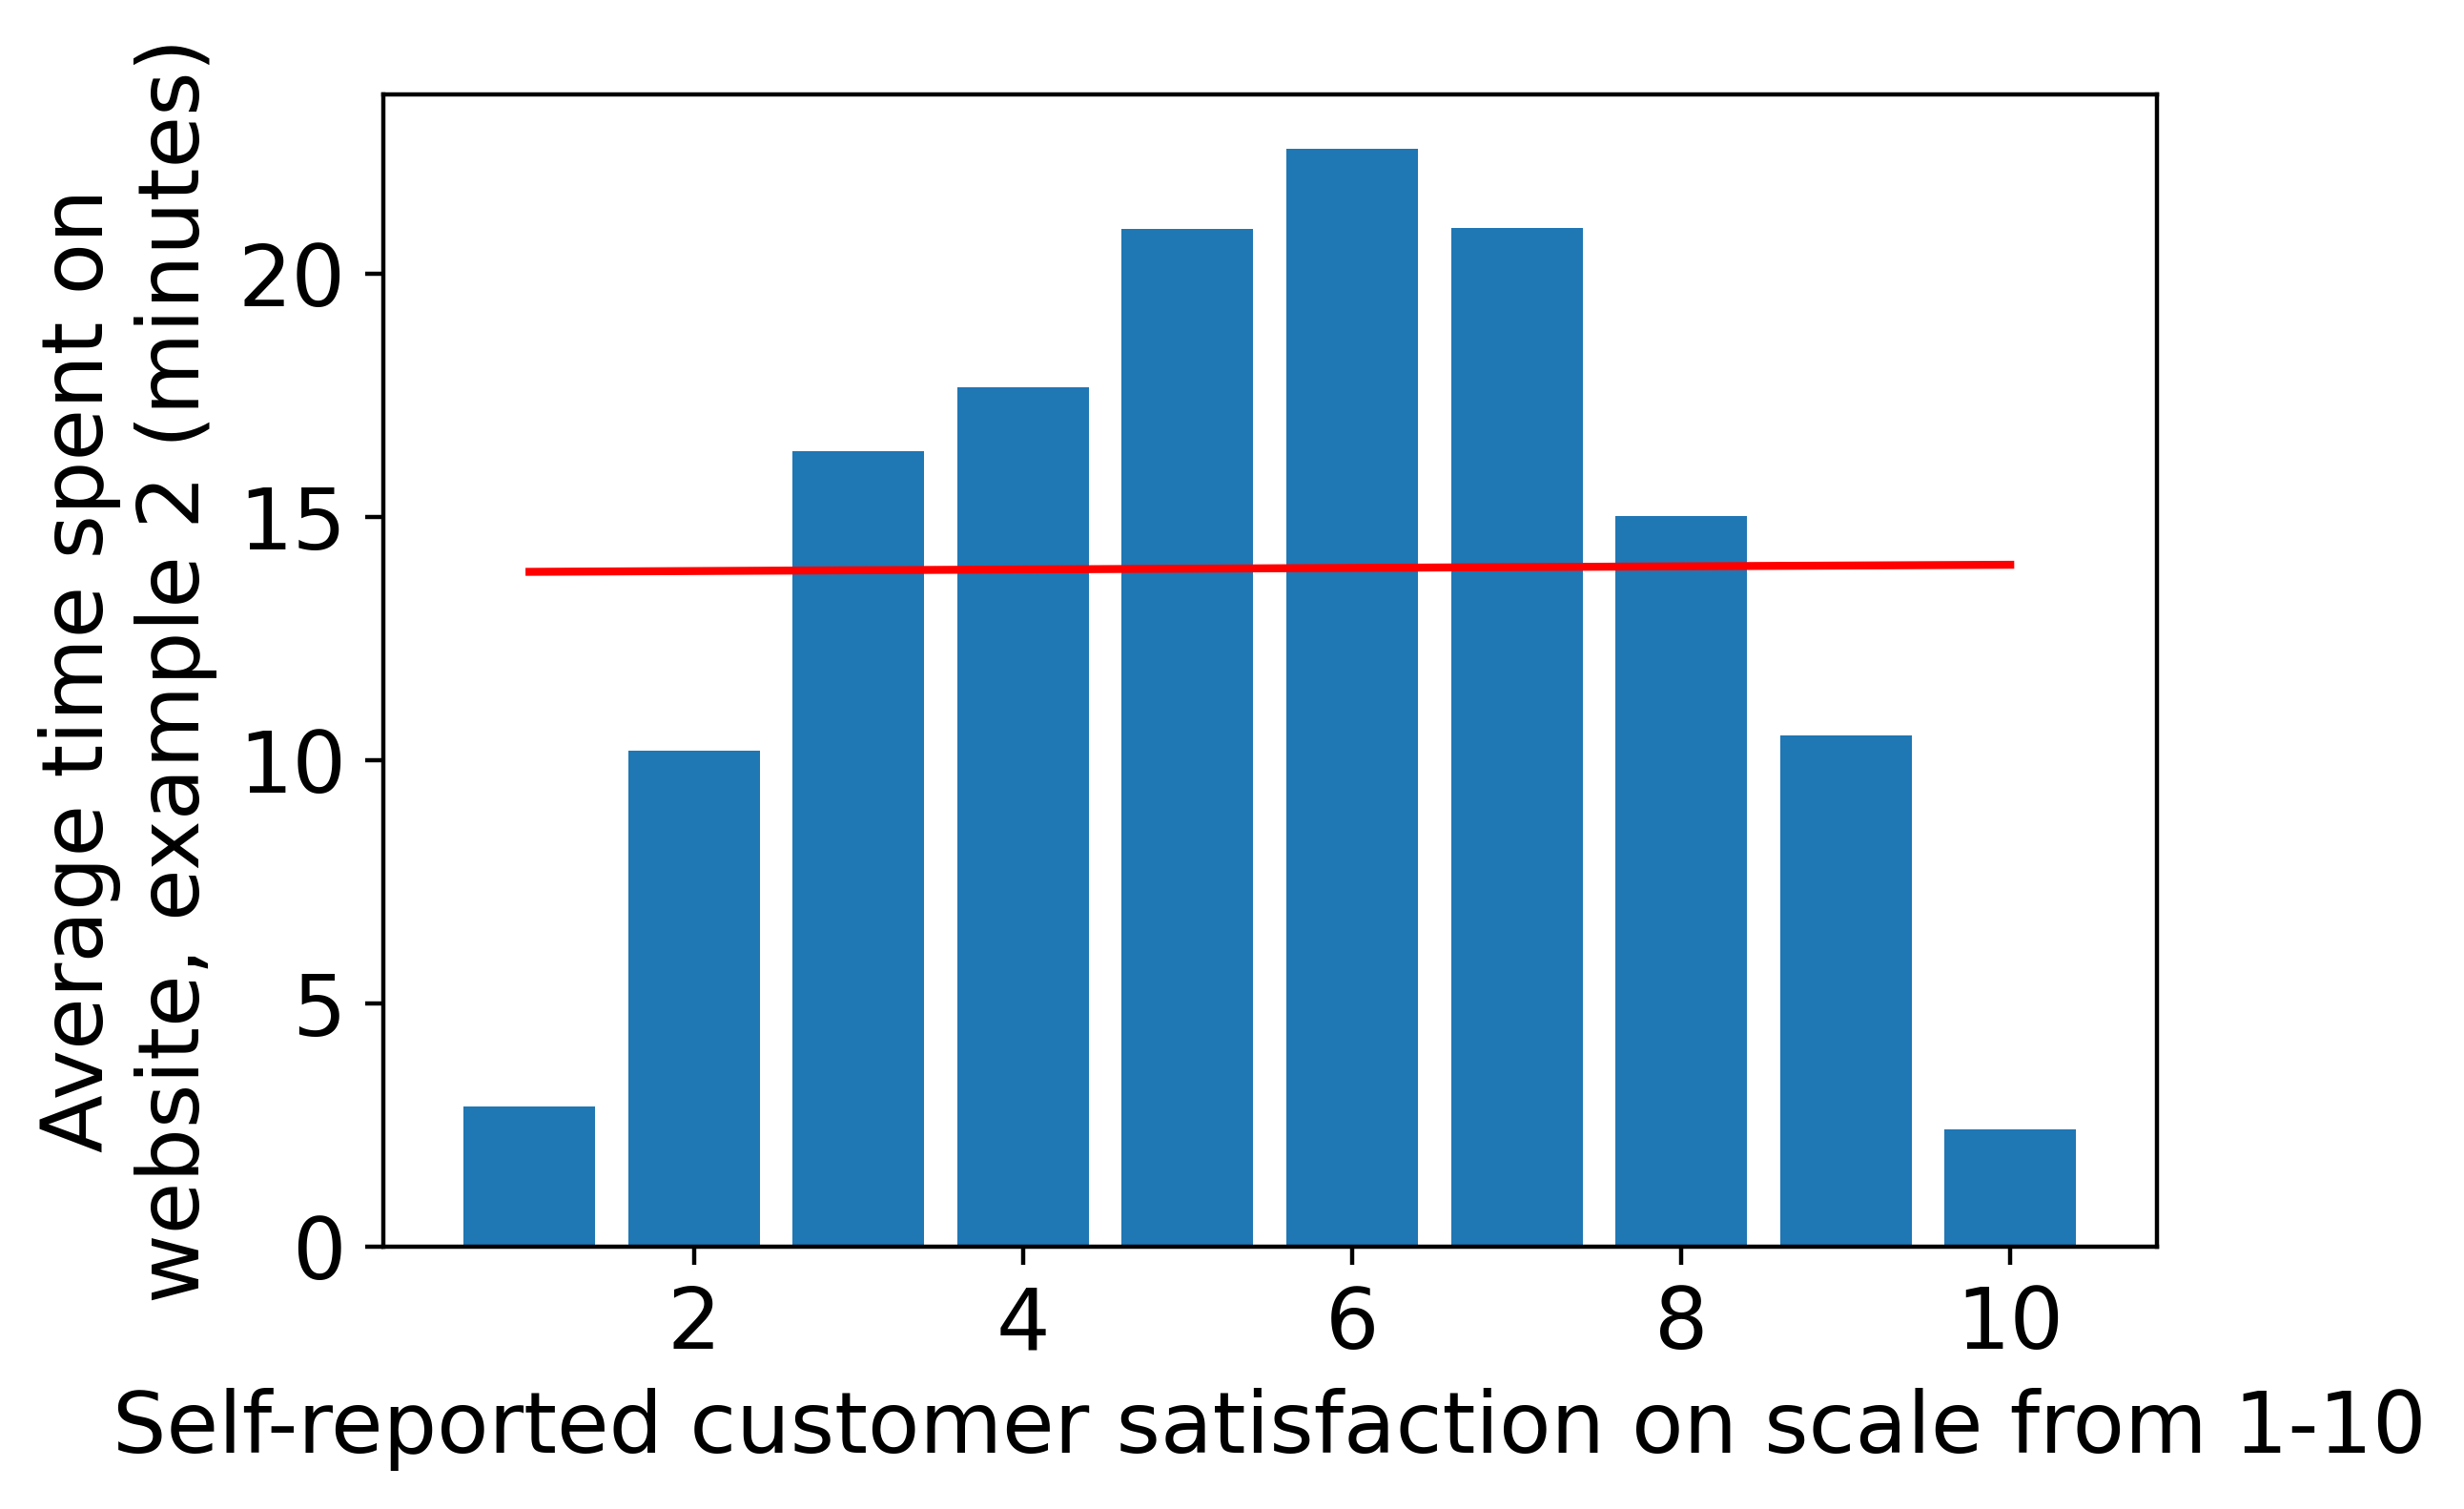

In [9]:
plt.plot(X, intercept_poly + slope_poly*X, 'r-')
plt.bar(X,Y_poly,align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')

In [10]:
df_clean_2 = pd.read_csv('../Data/df_clean_2_01.csv')

In [11]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

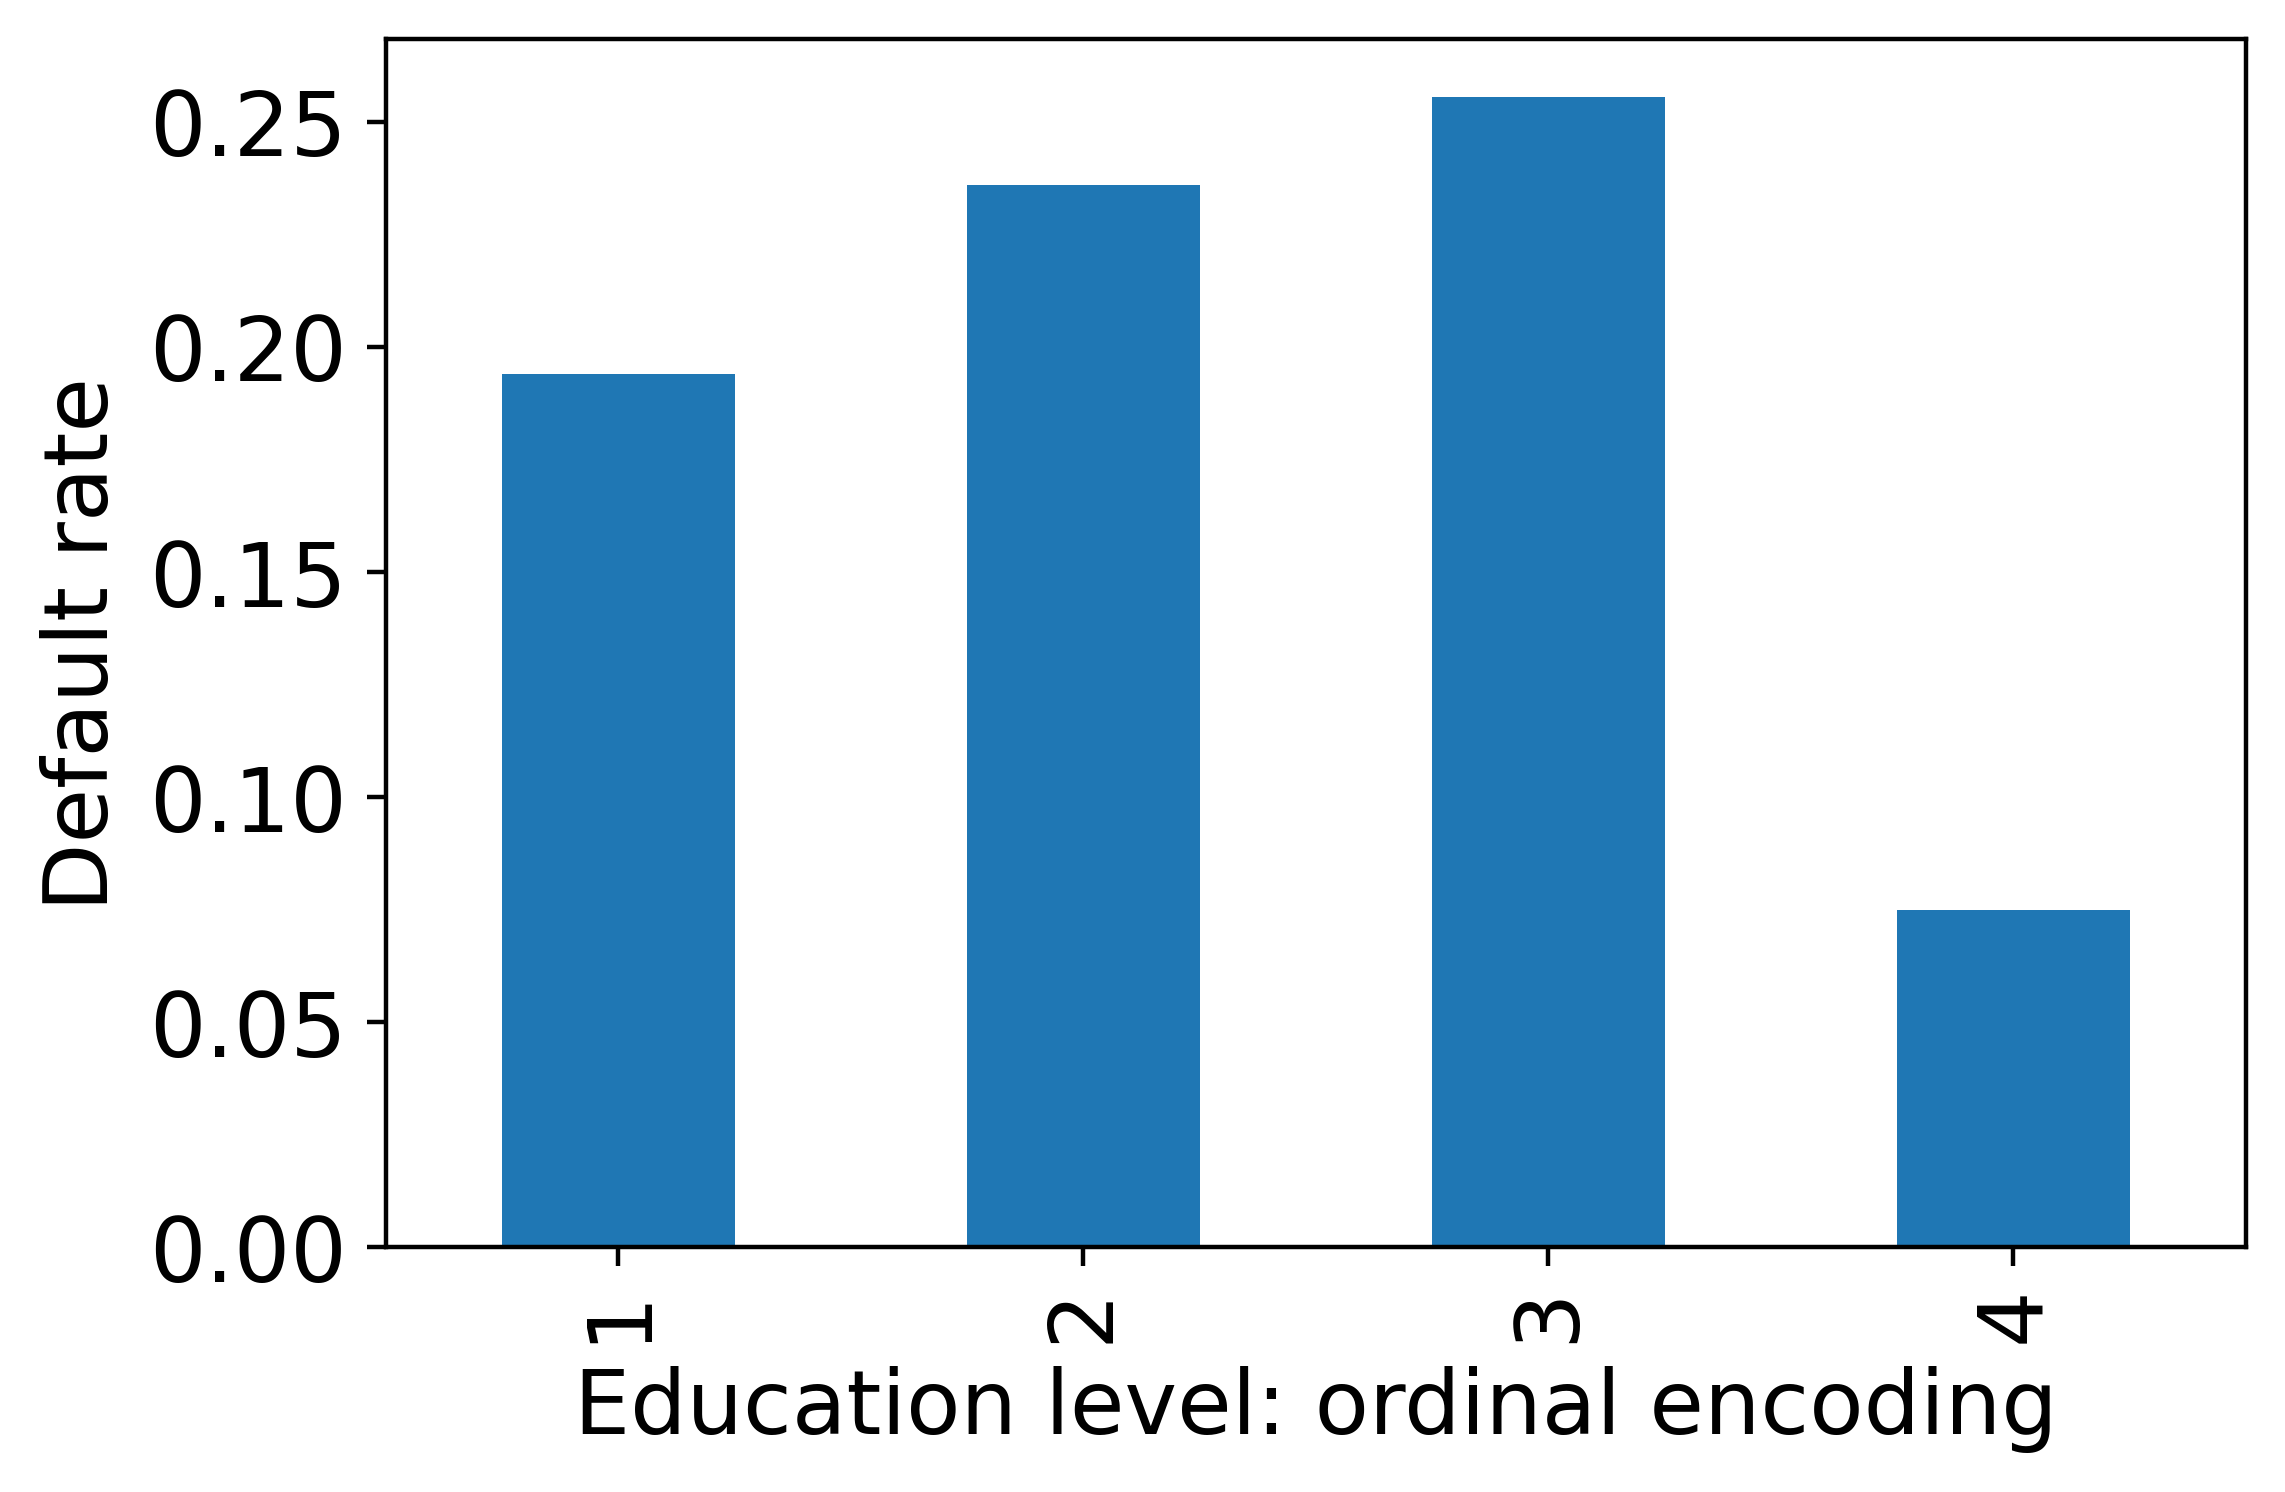

In [12]:
df_clean_2.groupby('EDUCATION').agg(
    {'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')